#### Problem statement:
  Companies like Amazon, Jumia,etc, use their website sales data to maximize profits. This data can be used to analyze the most products sold together or what month has the highest sales.
The date used is all the sales made in year 2019.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob 
import warnings
warnings.filterwarnings('ignore')

In [2]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
    df=df.drop_duplicates()
    return df

In [3]:
files=glob("/Users/bambino/Documents/DATASETS/Sales_*.csv")
files

['/Users/bambino/Documents/DATASETS\\Sales_April_2019.csv',
 '/Users/bambino/Documents/DATASETS\\Sales_August_2019.csv',
 '/Users/bambino/Documents/DATASETS\\Sales_December_2019.csv',
 '/Users/bambino/Documents/DATASETS\\Sales_February_2019.csv',
 '/Users/bambino/Documents/DATASETS\\Sales_January_2019.csv',
 '/Users/bambino/Documents/DATASETS\\Sales_July_2019.csv',
 '/Users/bambino/Documents/DATASETS\\Sales_June_2019.csv',
 '/Users/bambino/Documents/DATASETS\\Sales_March_2019.csv',
 '/Users/bambino/Documents/DATASETS\\Sales_May_2019.csv',
 '/Users/bambino/Documents/DATASETS\\Sales_November_2019.csv',
 '/Users/bambino/Documents/DATASETS\\Sales_October_2019.csv',
 '/Users/bambino/Documents/DATASETS\\Sales_September_2019.csv']

In [4]:
frame=[wrangle(i) for i in files]

In [5]:
df=pd.concat(frame)

In [6]:
df.shape

(185710, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185710 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185698 non-null  object
 1   Product           185698 non-null  object
 2   Quantity Ordered  185698 non-null  object
 3   Price Each        185698 non-null  object
 4   Order Date        185698 non-null  object
 5   Purchase Address  185698 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
df.isnull().sum()

Order ID            12
Product             12
Quantity Ordered    12
Price Each          12
Order Date          12
Purchase Address    12
dtype: int64

In [10]:
df.dropna(how='all',inplace=True)

In [11]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
cols=df[df['Order Date']=='Order Date']
cols


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1483,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
775,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
158,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
433,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
964,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1172,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
df.drop([519,211,254,1483,1073,775,158,433,964,1172,521,1679],axis=0,inplace=True)

In [14]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [15]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [16]:
df['Month']=df['Order Date'].apply(lambda time:time.month)

In [17]:
mmap={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
      7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['Month']=df['Month'].map(mmap)

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [19]:
df.Product.value_counts()

USB-C Charging Cable          21845
Lightning Charging Cable      21595
AAA Batteries (4-pack)        20593
AA Batteries (4-pack)         20543
Wired Headphones              18827
Apple Airpods Headphones      15518
Bose SoundSport Headphones    13291
27in FHD Monitor               7494
iPhone                         6834
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6167
Google Phone                   5519
Flatscreen TV                  4790
Macbook Pro Laptop             4719
ThinkPad Laptop                4124
20in Monitor                   4095
Vareebadd Phone                2064
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [20]:
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
df['Price Each']=df['Price Each'].astype(float)

In [21]:
df['Sales made']=df['Quantity Ordered'] * df['Price Each']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185555 entries, 0 to 11685
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185555 non-null  object        
 1   Product           185555 non-null  object        
 2   Quantity Ordered  185555 non-null  int32         
 3   Price Each        185555 non-null  float64       
 4   Order Date        185555 non-null  datetime64[ns]
 5   Purchase Address  185555 non-null  object        
 6   Month             185555 non-null  object        
 7   Sales made        185555 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 12.0+ MB


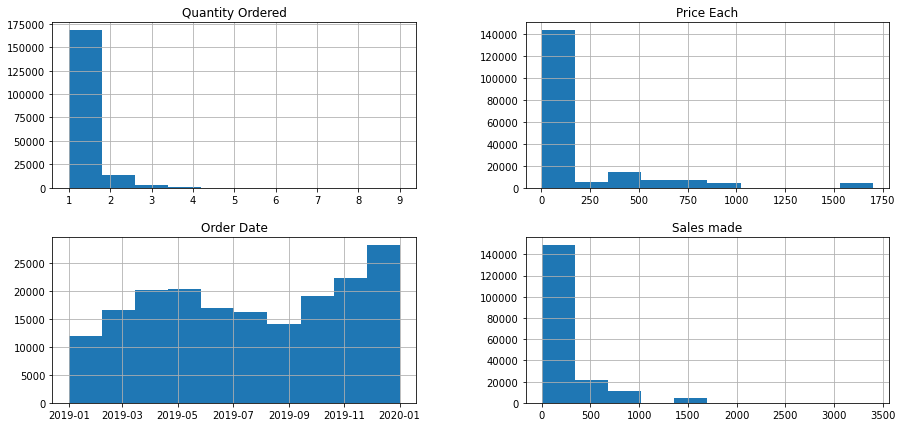

In [23]:
df.hist(figsize=(15,7));

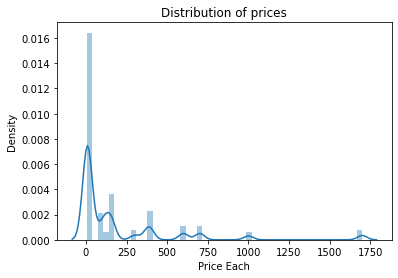

In [24]:
sns.distplot(df['Price Each'])
plt.title('Distribution of prices');

### What month has the highest sales?

In [25]:
pl=df.groupby('Month')['Sales made'].sum()

In [26]:
pl

Month
April        3.387119e+06
August       2.238529e+06
December     4.606770e+06
February     2.198996e+06
January      1.820098e+06
July         2.643476e+06
June         2.575821e+06
March        2.804401e+06
May          3.149295e+06
November     3.196802e+06
October      3.732659e+06
September    2.092330e+06
Name: Sales made, dtype: float64

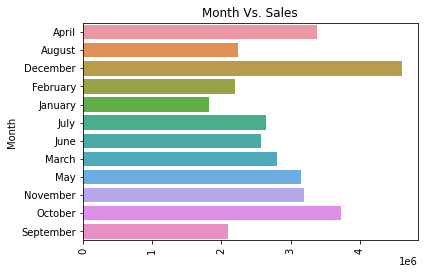

In [27]:
sns.barplot(pl.values,pl.index)
plt.xticks(rotation=90)
plt.title('Month Vs. Sales');

### Product with the highest sale value

In [28]:
max_sales=df['Sales made'].max()
max_sales

3400.0

In [29]:
indices=np.where(df['Sales made']==3400.0)
df.iloc[indices]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales made
4717,181069,Macbook Pro Laptop,2,1700.0,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",April,3400.0
5219,181544,Macbook Pro Laptop,2,1700.0,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",April,3400.0
385,210292,Macbook Pro Laptop,2,1700.0,2019-06-08 09:00:00,"953 Ridge St, San Francisco, CA 94016",June,3400.0
6776,200528,Macbook Pro Laptop,2,1700.0,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",May,3400.0


Product Macbook Pro Laptop has the highest sales at 3400

### Most ordered product

In [30]:
c=df.Product.value_counts()
c

USB-C Charging Cable          21845
Lightning Charging Cable      21595
AAA Batteries (4-pack)        20593
AA Batteries (4-pack)         20543
Wired Headphones              18827
Apple Airpods Headphones      15518
Bose SoundSport Headphones    13291
27in FHD Monitor               7494
iPhone                         6834
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6167
Google Phone                   5519
Flatscreen TV                  4790
Macbook Pro Laptop             4719
ThinkPad Laptop                4124
20in Monitor                   4095
Vareebadd Phone                2064
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

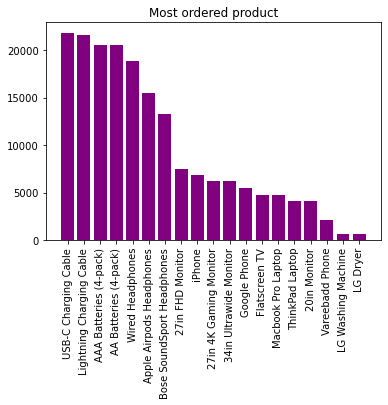

In [31]:
plt.bar(c.index,c.values,color=['purple'])
plt.xticks(rotation=90)
plt.title('Most ordered product');

USB-C Charging Cable, Bose SoundSport Headphones, and Google Phone are the top products the the highest orders for 2019.<br>
34in Ultrawide Monitor, LG Washing Machine, and Vareebadd Phone are the least ordered phones in 2019.

### What product made the most sum total sales in 2019?

In [32]:
x=df.groupby('Product')['Sales made'].sum().sort_values(ascending=False)

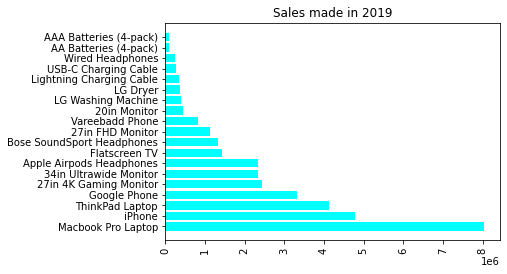

In [33]:
plt.barh(x.index,x.values,color='cyan')
plt.xticks(rotation=90)
plt.title('Sales made in 2019');

Macbook Pro Laptop, ThinkPad Laptop, and iPhone were the most succesfull products of 2019.

### What city were most orders coming from?


In [34]:
df['Purchase Address']

0                   917 1st St, Dallas, TX 75001
2              682 Chestnut St, Boston, MA 02215
3           669 Spruce St, Los Angeles, CA 90001
4           669 Spruce St, Los Angeles, CA 90001
5              333 8th St, Los Angeles, CA 90001
                          ...                   
11681     840 Highland St, Los Angeles, CA 90001
11682    216 Dogwood St, San Francisco, CA 94016
11683       220 12th St, San Francisco, CA 94016
11684     511 Forest St, San Francisco, CA 94016
11685     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185555, dtype: object

In [35]:
df['City']=df['Purchase Address'].str.split(',',expand=True)[1]

In [36]:
d=df['City'].value_counts()
d

 San Francisco    44627
 Los Angeles      29541
 New York City    24835
 Boston           19887
 Atlanta          14853
 Dallas           14788
 Seattle          14705
 Portland         12438
 Austin            9881
Name: City, dtype: int64

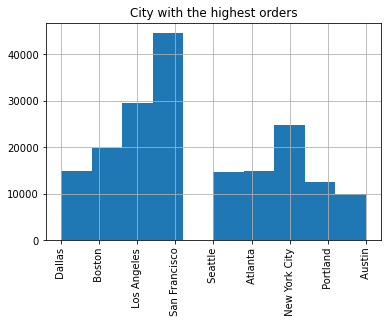

In [37]:
df['City'].hist()
plt.xticks(rotation=90)
plt.title('City with the highest orders');

San Francisco, Los Angeles, and New York City are the cities with the highest orders.<br>
Seattle, Portland, and Austin are the cities with the least amount of orders.

### What city has the highest sum total sales for 2019?

In [38]:
g=df.groupby('City')['Sales made'].sum().sort_values()
g

City
 Austin           1.816123e+06
 Portland         2.316899e+06
 Seattle          2.743007e+06
 Dallas           2.764561e+06
 Atlanta          2.792522e+06
 Boston           3.656053e+06
 New York City    4.660860e+06
 Los Angeles      5.446407e+06
 San Francisco    8.249864e+06
Name: Sales made, dtype: float64

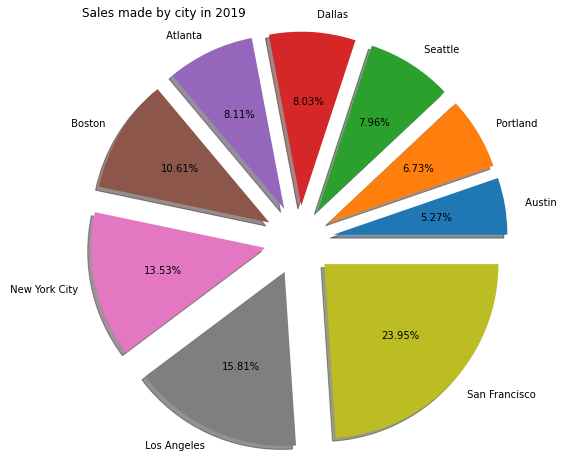

In [39]:
plt.figure(figsize=(8,8))
explode=[0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
plt.pie(g,labels=g.index,autopct='%1.2f%%',explode=explode,shadow=True)
plt.title('Sales made by city in 2019',loc='left');

### What products are usually bought together?

In [40]:
sd=df[df['Order ID'].duplicated(keep=False)]
sd

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales made,City
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,3.84,Atlanta
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,11.99,Atlanta
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,5.98,Atlanta
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",September,600.00,San Francisco


In [41]:
sd['Grouped']=sd.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
sd

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales made,City,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",September,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [42]:
ol=sd['Grouped'].value_counts()[:15]
ol

iPhone,Lightning Charging Cable                             1772
Google Phone,USB-C Charging Cable                           1712
iPhone,Wired Headphones                                      720
Vareebadd Phone,USB-C Charging Cable                         624
Google Phone,Wired Headphones                                606
iPhone,Apple Airpods Headphones                              572
Google Phone,Bose SoundSport Headphones                      322
Google Phone,USB-C Charging Cable,Wired Headphones           237
Vareebadd Phone,Wired Headphones                             208
iPhone,Lightning Charging Cable,Wired Headphones             165
iPhone,Lightning Charging Cable,Apple Airpods Headphones     129
Vareebadd Phone,Bose SoundSport Headphones                   120
Lightning Charging Cable,USB-C Charging Cable                110
Lightning Charging Cable,AA Batteries (4-pack)               104
AA Batteries (4-pack),Lightning Charging Cable               102
Name: Grouped, dtype: int

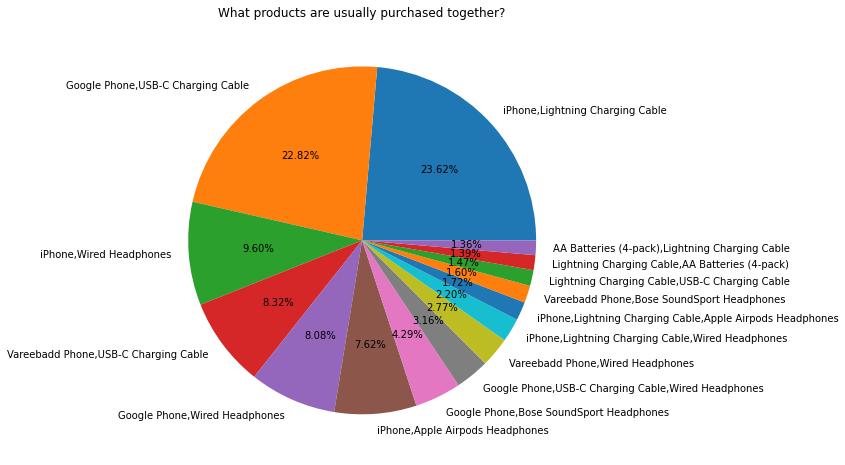

In [43]:
plt.figure(figsize=(8,8))
plt.pie(ol,labels=ol.index,autopct='%1.2f%%')
plt.title('What products are usually purchased together?');

### Time series plot of sales made in 2019

<AxesSubplot:xlabel='Month', ylabel='Sales made'>

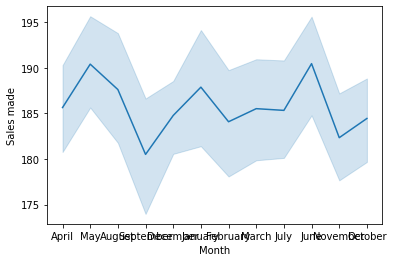

In [50]:
sns.lineplot(y=df['Sales made'],x=df['Month'])